## Zomato Data Analysis

In [123]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Overview

In [124]:
df = pd.read_csv("zomato.csv", encoding="latin-1")

In [125]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [126]:
df.shape
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [128]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [129]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

### Data Cleaning

In [130]:
df.dropna(subset=['Cuisines', 'Aggregate rating'], inplace=True)

In [131]:
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

In [132]:
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes':1, 'No':0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes':1, 'No':0})

In [133]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),1,0,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),1,0,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),1,0,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),0,0,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),1,0,No,No,4,4.8,Dark Green,Excellent,229


## Exploratory Data Analysis

### cities have the most restaurants

In [134]:
df['City'].value_counts().head(10)

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

### Distribution of restaurant ratings

In [135]:
df['Aggregate rating'].describe()

count    9542.000000
mean        2.665238
std         1.516588
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

<Axes: >

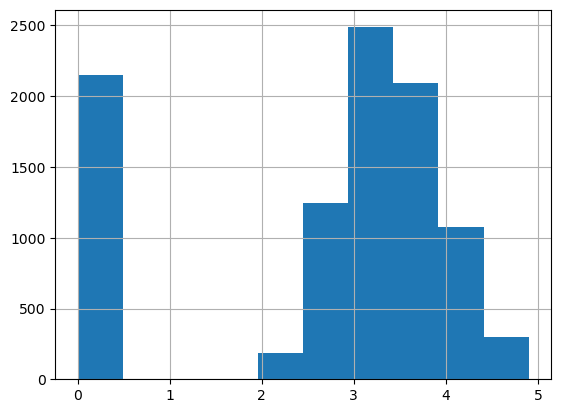

In [136]:
df['Aggregate rating'].hist(bins=10)

In [137]:
df.groupby('Has Online delivery')['Aggregate rating'].mean()

Has Online delivery
0    2.463517
1    3.248837
Name: Aggregate rating, dtype: float64

Top 10 most common cuisines

In [138]:
df['Cuisines'].value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Relationship between price and rating

In [139]:
df.groupby('Price range')['Aggregate rating'].mean()

Price range
1    1.997476
2    2.941054
3    3.682633
4    3.817918
Name: Aggregate rating, dtype: float64

 ### Restaurant & Location Insights

In [140]:
df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head(10)

City
Jakarta             308437.500000
Tangerang           250000.000000
Bogor               160000.000000
Bandung             150000.000000
Pasay City            3333.333333
Colombo               2375.000000
Mandaluyong City      2000.000000
Panchkula             2000.000000
Taguig City           1725.000000
Hyderabad             1361.111111
Name: Average Cost for two, dtype: float64

In [141]:
df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
Beechworth          4.600000
London              4.535000
Taguig City         4.525000
Tagaytay City       4.500000
Secunderabad        4.500000
Name: Aggregate rating, dtype: float64

In [142]:
top_locations = df['City'].value_counts().head(10)
top_locations

City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Cities with Most Restaurants'}, xlabel='City'>

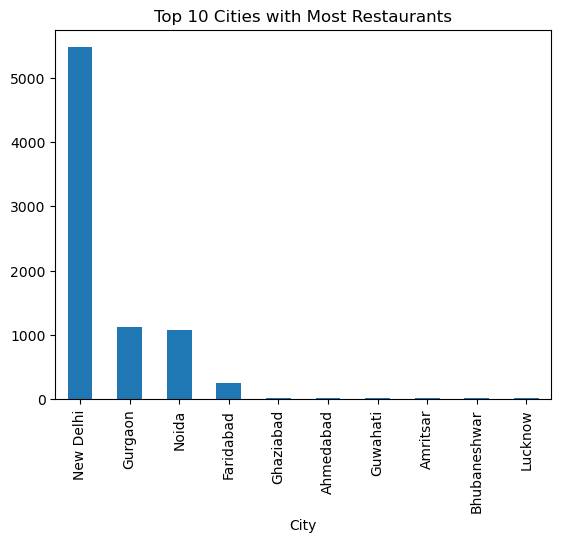

In [143]:
top_locations.plot(kind='bar', title='Top 10 Cities with Most Restaurants')

### Insight:
Restaurants offering online delivery receive slightly higher average ratings.

### Customer Preference Analysis

In [144]:
df.groupby('Has Online delivery')['Aggregate rating'].mean()

Has Online delivery
0    2.463517
1    3.248837
Name: Aggregate rating, dtype: float64

<Axes: xlabel='Has Online delivery', ylabel='Aggregate rating'>

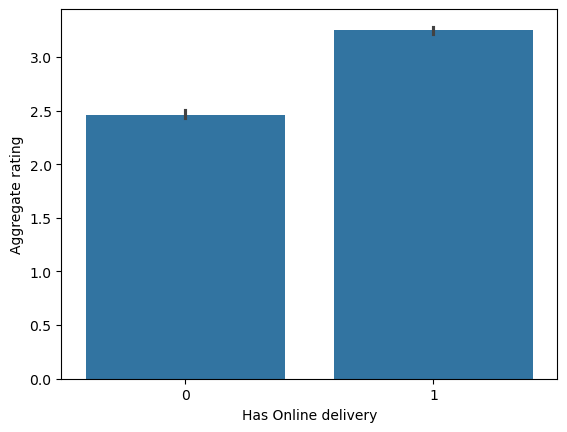

In [145]:
import seaborn as sns
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=df)

### Insight:
Table booking availability is associated with better customer experience.

In [146]:
df.groupby('Has Table booking')['Aggregate rating'].mean()


Has Table booking
0    2.557956
1    3.441969
Name: Aggregate rating, dtype: float64

In [147]:
top_cuisines = df['Cuisines'].value_counts().head(10)
top_cuisines


Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Cuisines'}, xlabel='Cuisines'>

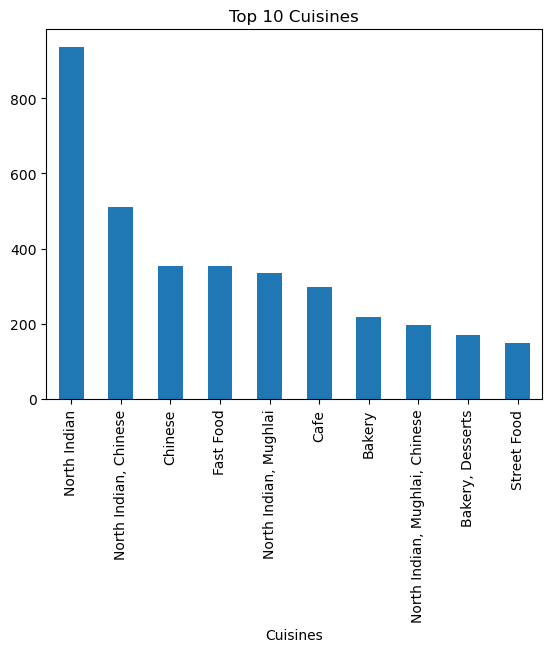

In [148]:
top_cuisines.plot(kind='bar', title='Top 10 Cuisines')


### Insight:
A few cuisines dominate the platform, reflecting customer preference trends.

### Pricing Analysis

<Axes: xlabel='Price range', ylabel='Aggregate rating'>

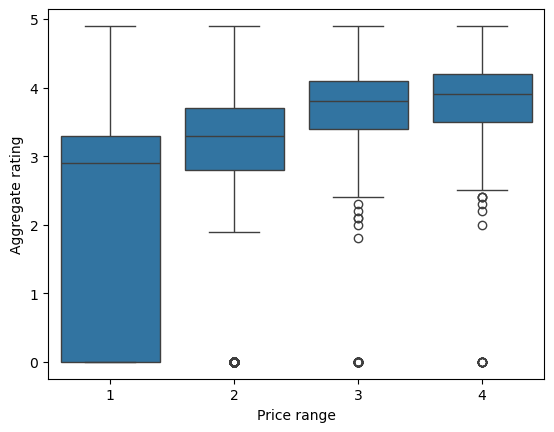

In [149]:
sns.boxplot(x='Price range', y='Aggregate rating', data=df)

### Insight:
Mid-range priced restaurants tend to receive higher and more consistent ratings.

In [150]:
df['Price range'].value_counts()

Price range
1    4438
2    3113
3    1405
4     586
Name: count, dtype: int64

Popularity Analysis

<Axes: xlabel='Votes', ylabel='Aggregate rating'>

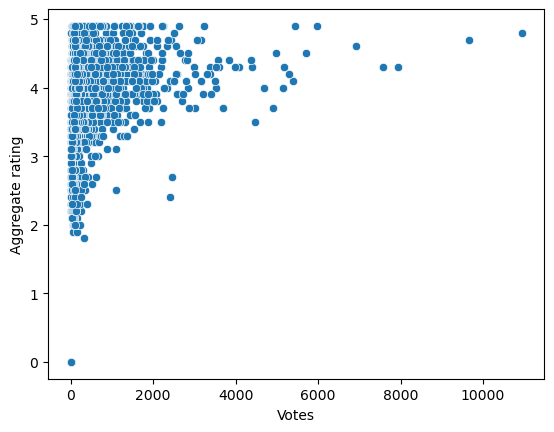

In [151]:
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)

### Insight:
Highly rated restaurants tend to receive more votes, indicating higher customer engagement.

In [152]:
df[['Restaurant Name', 'Votes']].sort_values(by='Votes', ascending=False).head(10)

,Restaurant Name,Votes
728,Toit,10934
735,Truffles,9667
3994,Hauz Khas Social,7931
2412,Peter Cat,7574
739,AB's - Absolute Barbecues,6907
2414,Barbeque Nation,5966
743,Big Brewsky,5705
2307,AB's - Absolute Barbecues,5434
736,The Black Pearl,5385
2411,BarBQ,5288


## Data Visualization

### 1. Correlation Heatmap

<Axes: >

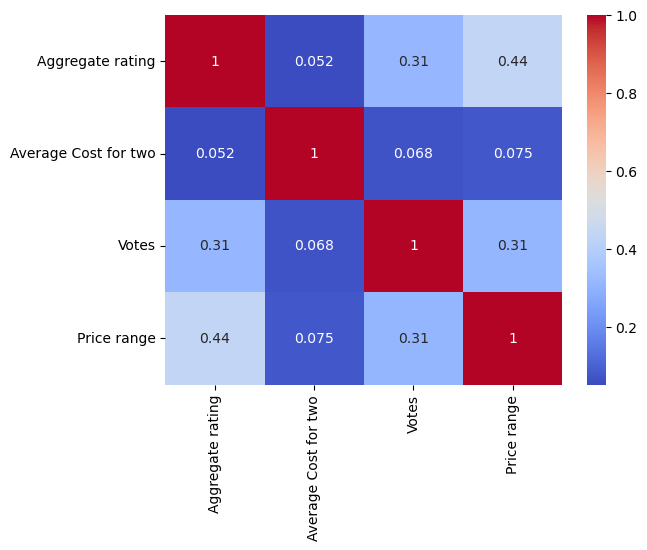

In [153]:
numeric_df = df[['Aggregate rating', 'Average Cost for two', 'Votes', 'Price range']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

### Insight

- Ratings show a moderate positive correlation with votes, meaning popular restaurants tend to be better rated.
- Average cost for two has weak correlation with ratings, indicating price is not a strong quality indicator.

- Price range does not significantly influence customer satisfaction.

### 2. Bar Chart – Top Cities

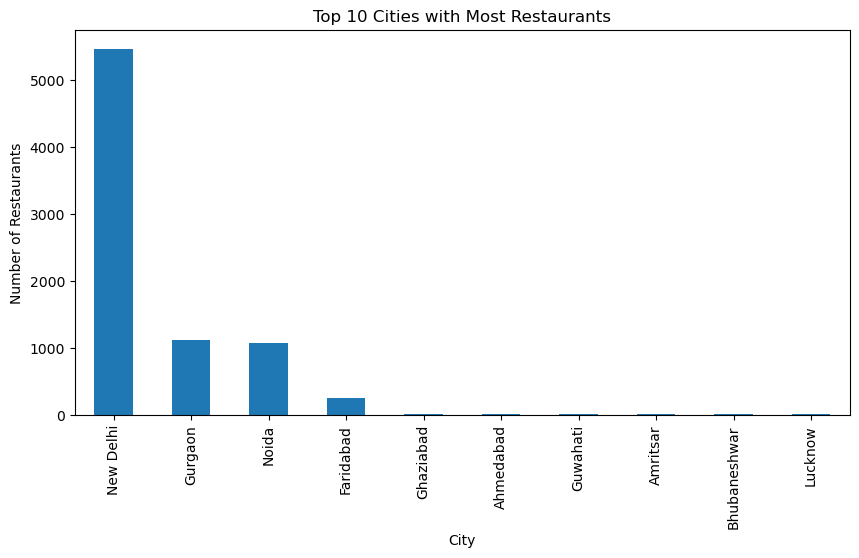

In [154]:
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

### Insight: Top Cities with Most Restaurants

- New Delhi dominates the dataset, with a significantly higher number of listed restaurants compared to other cities.

- Gurgaon and Noida form the second tier, indicating strong restaurant density in the Delhi-NCR region.

### 3. Bar Chart – Top Cuisines

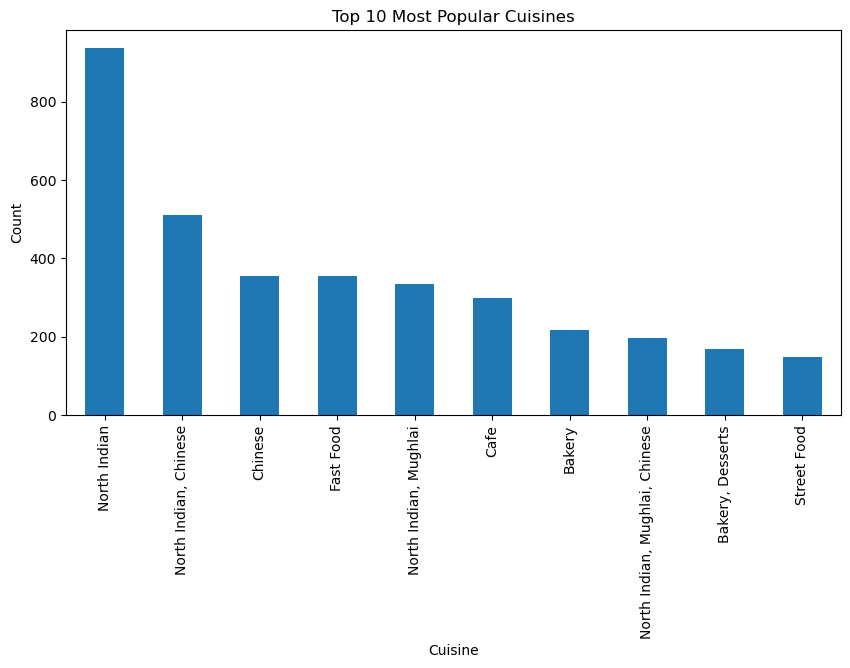

In [155]:
top_cuisines = df['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_cuisines.plot(kind='bar')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

### Insight

- A small number of cuisines dominate restaurant listings, reflecting strong and consistent customer preferences.

- Popular cuisines are widely available across locations, suggesting high market demand and scalability.

- Less common cuisines represent potential opportunities for niche targeting.

### 4. Box Plot – Price Range vs Rating

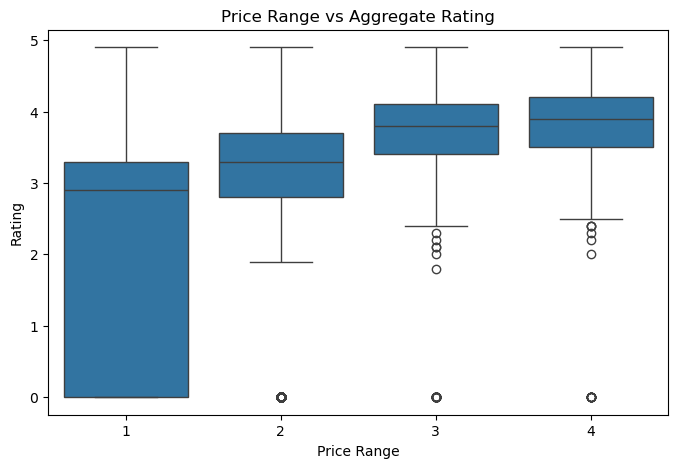

In [156]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Price Range vs Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

### Insight

- Mid-range priced restaurants tend to have higher and more consistent ratings.

- Budget restaurants show wider rating variation, indicating inconsistent customer experience.

- Premium pricing does not guarantee higher ratings, suggesting value-for-money is more important than price.

### 5. Scatter Plot – Votes vs Rating

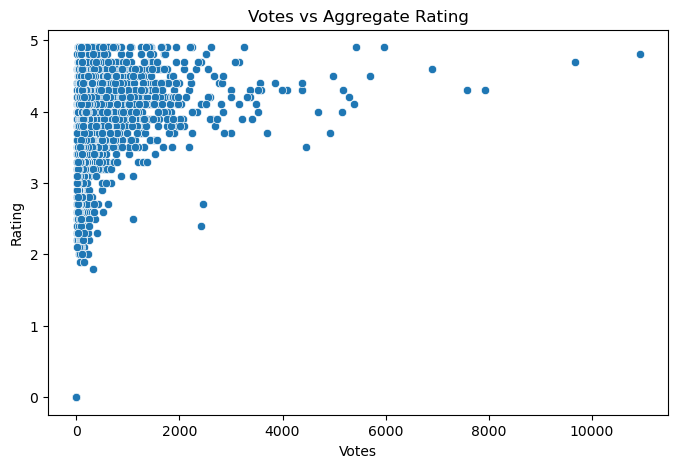

In [157]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()

### Insight

- Restaurants with higher ratings generally receive more customer votes, indicating greater engagement.

- Highly voted restaurants cluster around higher ratings, suggesting ratings become more reliable with more reviews.

- Low-vote restaurants show scattered ratings, indicating limited customer feedback.

## Insights & Conclusion

### Key Insights
- Restaurants offering online delivery tend to have higher ratings.
- Mid-range restaurants receive more customer engagement.
- Price does not strongly influence customer ratings.

### Business Takeaways
- Promoting online delivery restaurants can improve customer satisfaction.
- Zomato can focus on mid-range restaurants for better engagement.
